### **How does knowing data type (qualitative vs. quantitative) provide insights into the type of distribution that a random variable comes from?**
>  Knowing whether a variable is qualitative or quantitative constrains the type of distribution that a variable could come from. If data are quantitative, they come from one of the continuous distributions, so the set of possible values is infinite and because probability is defined by the area under the curve between two values, the probability of any given value is 0. If the data are qualititative, they come from one of the discrete distributions, so the set of possible values is discrete and any given value has a probability greater than 0.

### **What exactly does it mean to say that a random variable is normal with a mean of 100 and a standard deviation of 15? **
> The random variable has properties defined by the normal distribution, where the mean specifies the center of the distribution and the standard deviation defines the scale. The most likely/expected value of that distribution is 100, but it's fairly likely to observe data points between 85 and 115 (68.3% of the data under the curve takes on a value within this range). 

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  1.4.2     ✔ purrr   0.2.4
✔ tidyr   0.7.2     ✔ dplyr   0.7.4
✔ readr   1.1.1     ✔ stringr 1.2.0
✔ tibble  1.4.2     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


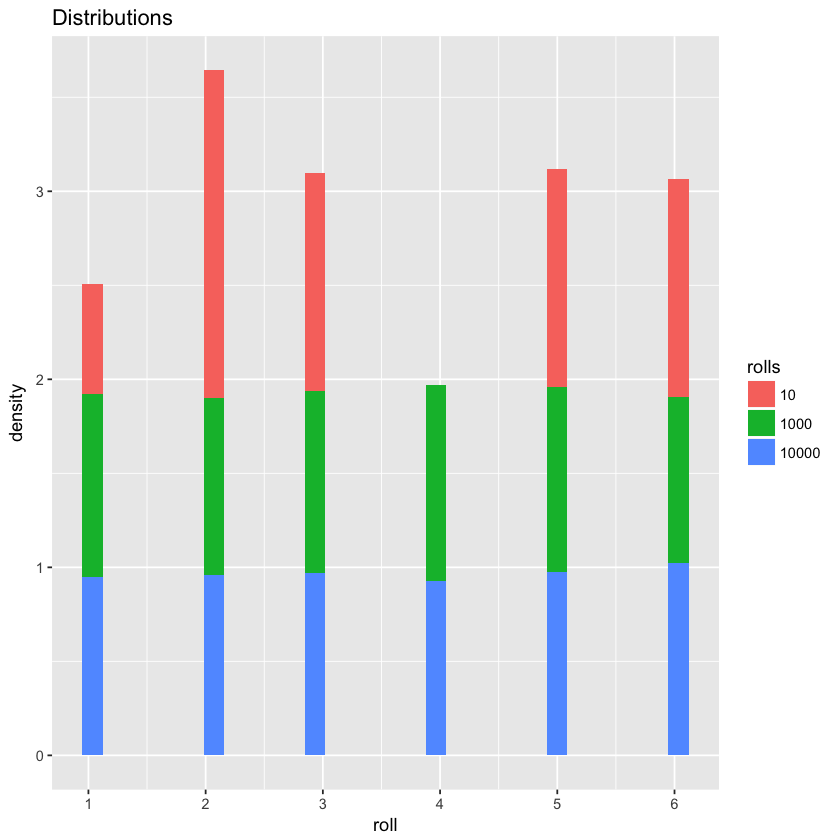

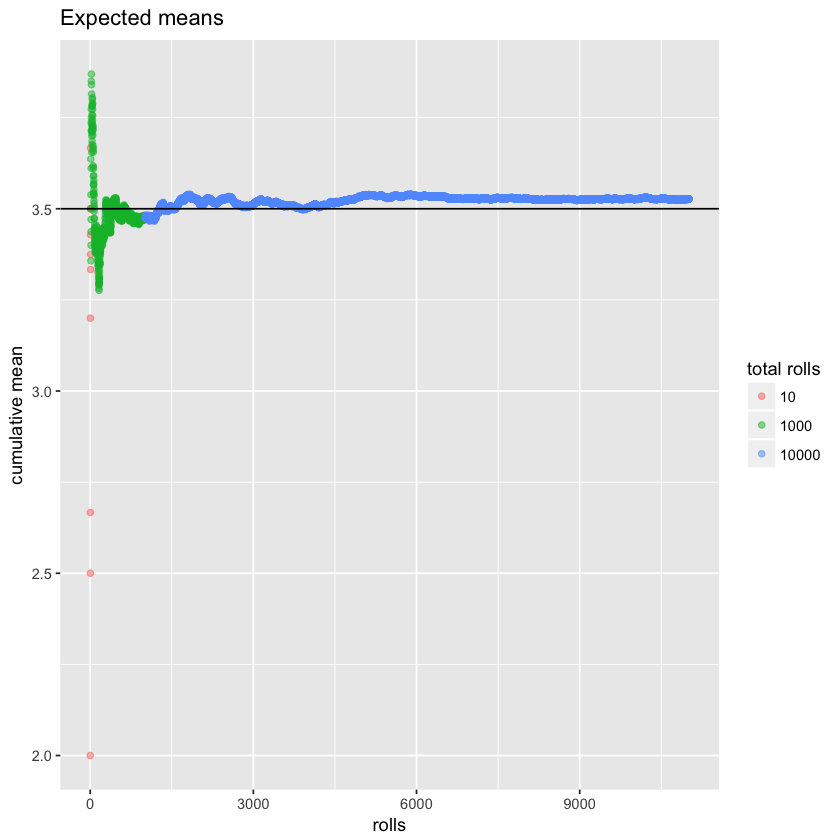

In [1]:
library(ggplot2)
library(tidyverse)
source("cumavg.R")

min_val <-0
max_val <-6
fair_expected_mean <-sum(min_val:max_val)/max_val

rolls_e1 <-10
rolls_e2 <-1000
rolls_e3 <-10000

e1 <- data.frame(result=ceiling(runif(rolls_e1,min=min_val,max=max_val)))
e2 <- data.frame(result=ceiling(runif(rolls_e2,min=min_val,max=max_val))) 
e3 <- data.frame(result=ceiling(runif(rolls_e3,min=min_val,max=max_val))) 

e1$rolls <- toString(rolls_e1)
e2$rolls <- toString(rolls_e2)
e3$rolls <- toString(rolls_e3)

dat <- rbind(e1,e2,e3)
dat$cavg <- cumavg(dat$result)

ggplot(dat, aes(result, fill=rolls)) + geom_histogram(aes(y=..density..))  + scale_x_continuous(breaks = c(1:6)) + 
  labs(colour = 'total rolls', x = 'roll') + ggtitle('Distributions')

ggplot(dat, aes(x=1:dim(dat)[1], y=cavg, colour=rolls)) + geom_point(alpha=0.5) + geom_hline(yintercept = fair_expected_mean)  +
  labs(colour = 'total rolls', x='rolls', y='cumulative mean') + ggtitle('Expected means') 


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


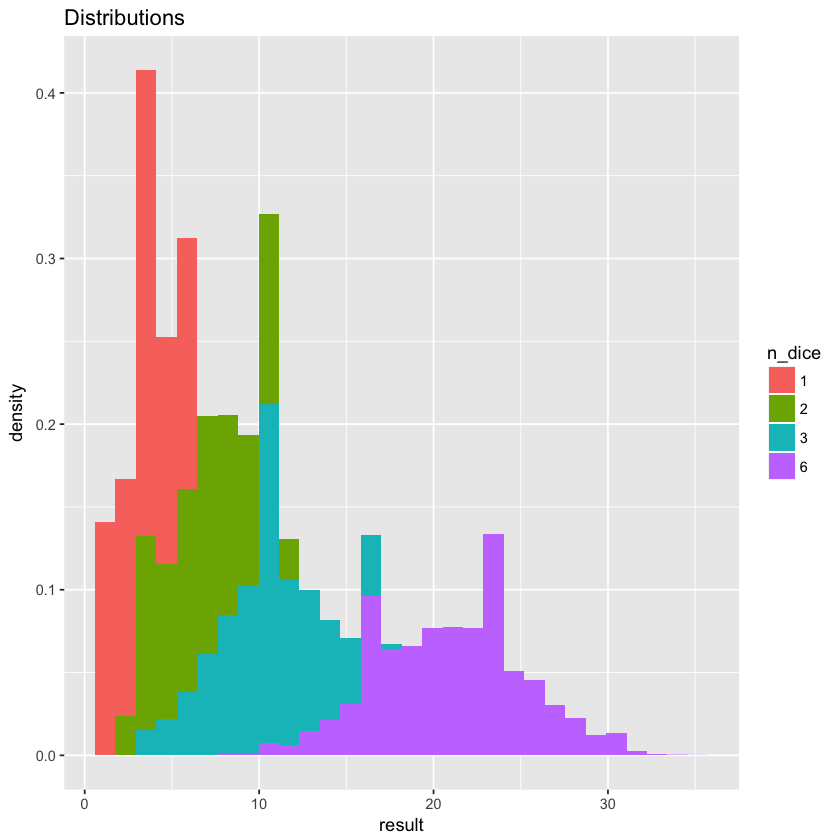

In [2]:
n_rolls <-10000
n_dice_e1 <- 1 
n_dice_e2 <- 2 
n_dice_e3 <- 3
n_dice_e4 <- 6


e1_results <- data.frame(result=rowSums(replicate(n_dice_e1, {
  t <- ceiling(runif(n_rolls, min=min_val, max=max_val))
})))

e2_results <- data.frame(result=rowSums(replicate(n_dice_e2, {
  t <- ceiling(runif(n_rolls, min=min_val, max=max_val))
})))

e3_results <- data.frame(result=rowSums(replicate(n_dice_e3, {
  t <- ceiling(runif(n_rolls, min=min_val, max=max_val))
})))

e4_results <- data.frame(result=rowSums(replicate(n_dice_e4, {
  t <- ceiling(runif(n_rolls, min=min_val, max=max_val))
})))

e1_results$n_dice <- toString(n_dice_e1)
e2_results$n_dice <- toString(n_dice_e2)
e3_results$n_dice <- toString(n_dice_e3)
e4_results$n_dice <- toString(n_dice_e4)

dat2 <- rbind(e1_results, e2_results, e3_results, e4_results)

ggplot(dat2, aes(result, fill=n_dice)) + geom_histogram(aes(y=..density..))  + 
  labs(colour = 'total rolls') + ggtitle('Distributions')


refline <- dat2 %>% group_by(n_dice) %>% 
  summarize(q25    = quantile(result,0.25),
            q75    = quantile(result,0.75),
            norm25 = qnorm( 0.25),
            norm75 = qnorm( 0.75),
            slope  = (q25 - q75) / (norm25 - norm75),
            int    = q25 - slope * norm25) %>%
       select(n_dice,slope, int) 


### The summed distribution of outcomes is closer to a normal distribution when 6 die are rolled. 

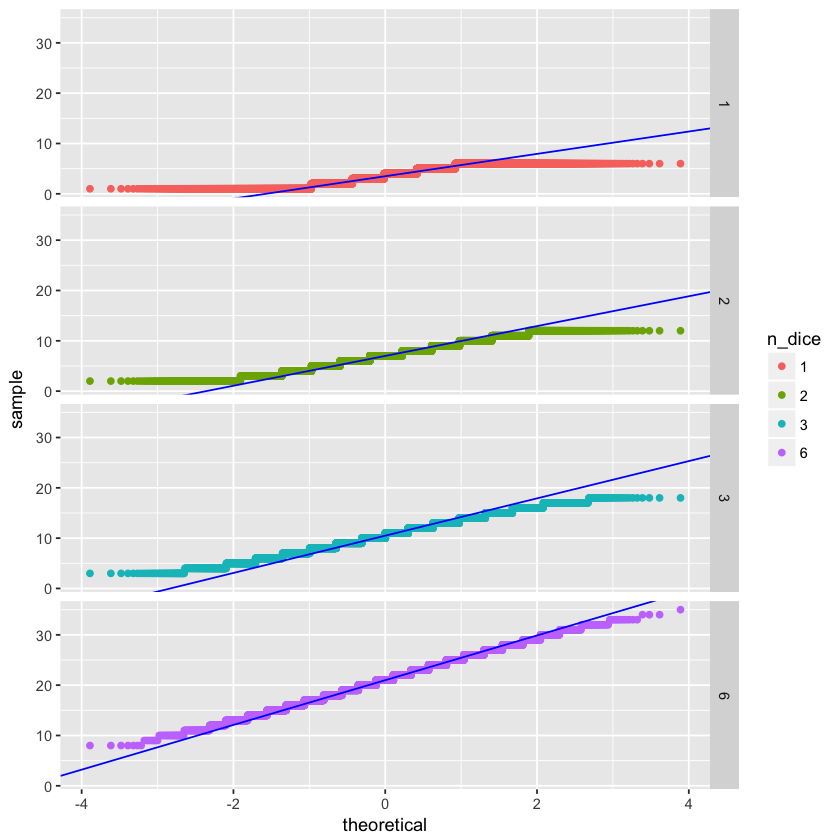

In [3]:
ggplot(dat2, aes(sample=result, color=n_dice)) + stat_qq(distribution=qnorm) + geom_abline(data=refline, aes(intercept=int, slope=slope), col="blue") +
  facet_grid(n_dice ~ .)